<a href="https://colab.research.google.com/github/Izmahikmah/covid-vaccination-vs-deaath-ratio/blob/main/Covid_Vaccination_vs_death_number.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
path = '/content/drive/MyDrive/Data Analyst/data_vaksin.csv'
data_vaksin = pd.read_csv (path)

data_vaksin.head()

,Unnamed: 0,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,New_deaths,population,ratio
0,0,Afghanistan,AFG,2021-05-11,504502.0,448878.0,55624.0,12,40194523.0,1.116764
1,1,Afghanistan,AFG,2021-05-20,547901.0,470341.0,77560.0,10,40194523.0,1.170162
2,2,Afghanistan,AFG,2021-05-24,573277.0,476367.0,96910.0,10,40194523.0,1.185154
3,3,Afghanistan,AFG,2021-05-26,590454.0,479372.0,111082.0,19,40194523.0,1.192630
4,4,Afghanistan,AFG,2021-05-27,593313.0,479574.0,113739.0,14,40194523.0,1.193133


In [4]:
dv=pd.concat([data_vaksin['date'],data_vaksin['total_vaccinations'],data_vaksin['New_deaths']],axis=1)
dv.columns = ['Tanggal','total_vaksinasi','angka_kematian']
dv

,Tanggal,total_vaksinasi,angka_kematian
0,2021-05-11,504502.0,12
1,2021-05-20,547901.0,10
2,2021-05-24,573277.0,10
3,2021-05-26,590454.0,19
4,2021-05-27,593313.0,14
...,...,...,...
24174,2021-11-15,6190303.0,1
24175,2021-11-16,6228119.0,0
24176,2021-11-18,6310431.0,1
24177,2021-11-19,6362499.0,0


In [5]:
dv1=dv[data_vaksin['country']=='Indonesia']
dv1

,Tanggal,total_vaksinasi,angka_kematian
9680,2021-01-28,373786.0,476
9681,2021-01-29,416299.0,187
9682,2021-01-30,502955.0,210
9683,2021-01-31,515681.0,270
9684,2021-02-01,574938.0,279
...,...,...,...
9937,2021-11-16,216663555.0,15
9938,2021-11-17,218286093.0,13
9939,2021-11-18,218409909.0,11
9940,2021-11-19,221362168.0,5


In [6]:
total_kematian = dv1['angka_kematian'].sum()
total_kematian

106920

In [7]:
A=[]
for i in range (1,263):
  A.append(i)
  i+=1

final_dv1=dv1.sort_values(by='total_vaksinasi',ascending=True)
final_dv1['kematian_ke']=A
final_dv1.reset_index()

,index,Tanggal,total_vaksinasi,angka_kematian,kematian_ke
0,9680,2021-01-28,373786.0,476,1
1,9681,2021-01-29,416299.0,187,2
2,9682,2021-01-30,502955.0,210,3
3,9683,2021-01-31,515681.0,270,4
4,9684,2021-02-01,574938.0,279,5
...,...,...,...,...,...
257,9937,2021-11-16,216663555.0,15,258
258,9938,2021-11-17,218286093.0,13,259
259,9939,2021-11-18,218409909.0,11,260
260,9940,2021-11-19,221362168.0,5,261


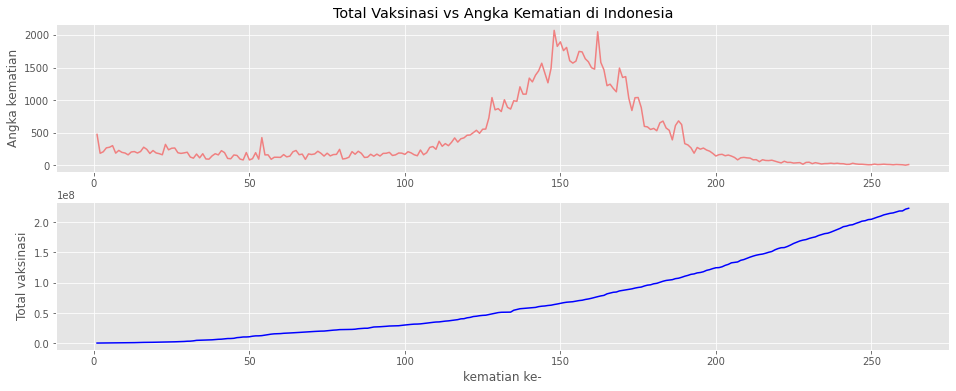

In [8]:
%matplotlib inline

plt.style.use('ggplot')

X = final_dv1['kematian_ke']
Y = final_dv1['angka_kematian']
Y1 = final_dv1['total_vaksinasi']
fig, ax = plt.subplots(ncols=1,nrows=2,figsize=(16,6))

ax[0].plot(X, Y, color='lightcoral')
ax[0].set_title('Total Vaksinasi vs Angka Kematian di Indonesia')
ax[0].set_ylabel('Angka kematian')

ax[1].plot(X, Y1, color='blue')
ax[1].set_xlabel('kematian ke-')
ax[1].set_ylabel('Total vaksinasi')

plt.show()

In [9]:
final_dv2=final_dv1[final_dv1['angka_kematian']>1800]
final_dv2.reset_index()

,index,Tanggal,total_vaksinasi,angka_kematian,kematian_ke
0,9827,2021-07-27,63944892.0,2069,148
1,9828,2021-07-28,64838074.0,1824,149
2,9829,2021-07-29,65959164.0,1893,150
3,9831,2021-07-31,67761337.0,1808,152
4,9841,2021-08-10,76933946.0,2048,162


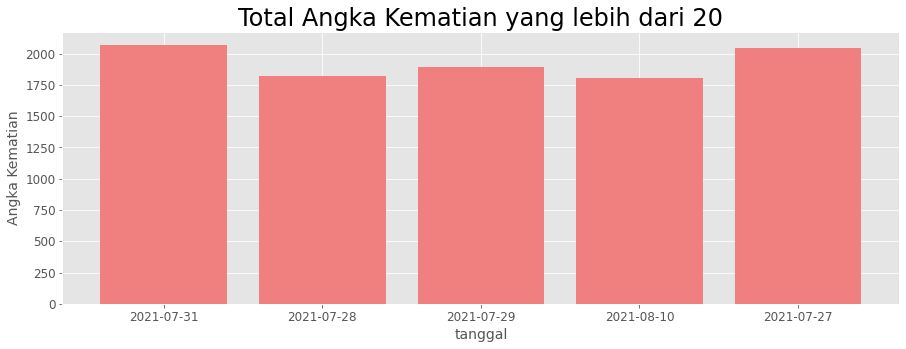

In [10]:
plt.figure(figsize=(15,5))

Index=['2021-07-31','2021-07-28','2021-07-29','2021-08-10','2021-07-27']
plt.bar(Index, final_dv2['angka_kematian'], color='lightcoral')

plt.title('Total Angka Kematian yang lebih dari 20', size=24)
plt.xlabel('tanggal', size=14)
plt.ylabel('Angka Kematian', size=14)
plt.xticks(size=12)
plt.yticks(size=12)

plt.show()